# Exploration of Heart Disease

## 1. Introduction and Project Topic: 

This project is focussed on an exploration of the Heart Disease Dataset from Kaggle. The goal of this dataset is to predict the presence of heart disease based on key health indicators. This is a **classification** problem because the goal field of the dataset is integer-valued 0 to 4 and can be approached as multi-class classification. Our motivations for exploring the dataset is simple: heart disease is an all too common killer, and early detection of it can save lives, therefore, predicting risk of heart disease based on health data can allow for preventative measures to be taken in advance. To take on this task, we will load the dataset (described below), clean the data, perform an EDA, and build models from which we will derive our results.

## 2. The Data

The [Heart Disease Dataset](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset) is taken from Kaggle. This dataset focuses on and contains 14 medical attributes such as a patient's age, sex, CP level, Trest BPS, cholesterol levels, FBS Levels, resting ECG, thalach level, exang level, , old peak history recorded, slope, CA levels, Thal levels, target, and blood pressure, which are used to predict whether a patient has heart disease. The target is a classification problem where the presence of heart disease is represented as an integer from 0 (no disease) to 4 (severe disease). The dataset consists of 303 rows, each being a patient (either healthy or present heart disease). To make it more clear, the important attributes are described here:

- Age:
    - Type: Numeric (integer).
    - Explanation: The patient's age in years. Age is a critical feature because the risk of heart disease typically increases with age.
- Sex:
    - Type: Categorical (binary: 1 = male, 0 = female).
    - Explanation: Biological sex can influence heart disease risk, as males are often at higher risk earlier in life than females.
- CP (Chest Pain Type):
    - Type: Categorical (values: 0, 1, 2, 3).
    - Explanation: Represents four types of chest pain experienced by the patient from 0 being typical angina and 3 being asymptomatic. Chest pain is a significant predictor of heart disease, especially angina.
- Trestbps (Resting Blood Pressure):
    - Type: Numeric (integer).
    - Explanation: Patient’s resting blood pressure (in mm Hg). High resting blood pressure is a known risk factor for heart disease.
- Chol (Serum Cholesterol in mg/dl):
    - Type: Numeric (integer).
    - Explanation: Serum cholesterol in milligrams per deciliter of blood. High cholesterol levels are strongly correlated with heart disease.
- FBS (Fasting Blood Sugar > 120 mg/dl):
    - Type: Categorical (binary: 1 = True, 0 = False).
    - Explanation: Indicates whether the patient’s fasting blood sugar level is above 120 mg/dl. Elevated blood sugar can signal diabetes, which increases heart disease risk.
- Restecg (Resting Electrocardiographic Results):
    - Type: Categorical (0, 1, 2).
    - Explanation: Represents the results of the resting electrocardiogram:
        - 0: Normal
        - 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression > 0.05 mV)
        - 2: Showing probable or definite left ventricular hypertrophy.
    - This feature reflects the electrical activity of the heart and is useful in diagnosing heart conditions.
- Thalach (Maximum Heart Rate Achieved):
    - Type: Numeric (integer).
    - Explanation: The maximum heart rate achieved during exercise. Higher heart rates during exertion can indicate better cardiovascular health.
- Exang (Exercise-Induced Angina):
    - Type: Categorical (binary: 1 = yes, 0 = no).
    - Explanation: Whether the patient experienced angina (chest pain) during exercise. Exercise-induced angina is a key indicator of coronary artery disease.
- Oldpeak (ST Depression Induced by Exercise):
    - Type: Numeric (float).
    - Explanation: Represents ST depression induced by exercise relative to rest. It’s a sign of heart stress and potential ischemia (lack of blood flow).
- Slope (Slope of the Peak Exercise ST Segment):
    - Type: Categorical (0, 1, 2).
    - Explanation: Describes the slope of the ST segment during peak exercise, 0 being upsloping and, 1 is flat, and 2 is downsloaping. Flat or downsloping segments can indicate heart issues, while upsloping is generally better.
- Ca (Number of Major Vessels Colored by Fluoroscopy):
    - Type: Numeric (integer: 0-3).
    - Explanation: The number of major vessels (0-3) colored by fluoroscopy (a type of X-ray). Higher numbers indicate more severe blockages.
- Thal (Thalassemia):
    - Type: Categorical (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect).
    - Explanation: A blood disorder called thalassemia can affect the presence of heart disease. Fixed or reversible defects in blood flow indicate potential heart problems.
- Target:
    - Type: Categorical (binary: 0 = no heart disease, 1 = heart disease).
    - Explanation: The target label. This is what the models will aim to predict (whether or not the patient has heart disease).

## 3. Data Cleaning and EDA

### A. Data Cleaning

For this dataset we had no missing data points and verified this by checking for any null values. We then checked for any outlier data that could wrongfully skew our data, like an unreasonable age or cholesterol. To do this we created boxplots of the numeric data and to help visualize possible outliers and highlight the data points outside the normal range. Using both the IQR method and Z-scoring we were able to confirm and remove the outliers from the data, resulting in 263 remaining rows.

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get the columns of the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Get the total number of rows
num_rows = df.shape[0]
print("\nTotal number of rows in the dataset:")
print(num_rows)


# Get total target with disease or without
target = df['target'].value_counts()
print("\nNumber of patient with heart disease (1) or healthy(0):")
print(target)

#Check for missing values
missing = df.isnull().sum()
# print("\nMissing data:")
# print(missing)
print("No missing or null data.")

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Columns in the dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Total number of rows in the dataset:
303

Number of patient with heart disease (1) or healthy(0):
1    165
0    138
Name: target, dtype: int64
No missing or null data.


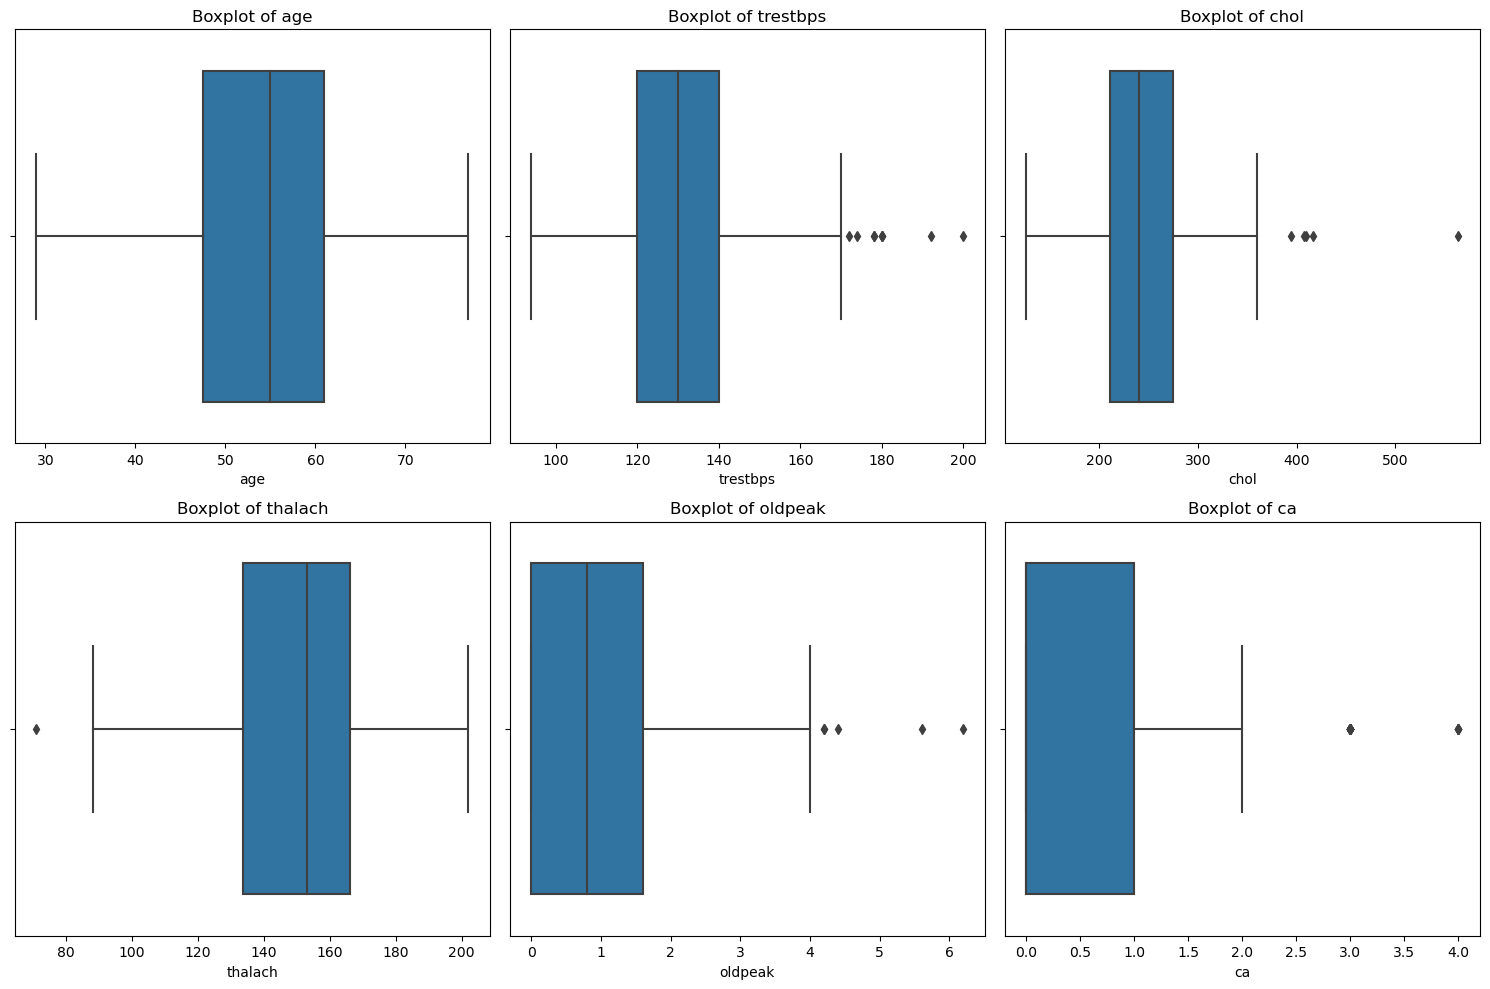

Remaining data points after removing outliers:
(263, 14)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#List of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Plottig boxplots to detect outliers
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplying IQR method to each numerical column
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)

print("Remaining data points after removing outliers with IQR:")
print(df.shape)


Remaining data points after removing outliers with Z-Score method:
(263, 14)
Cleaned dataset saved as 'heart_disease_clean.csv'.


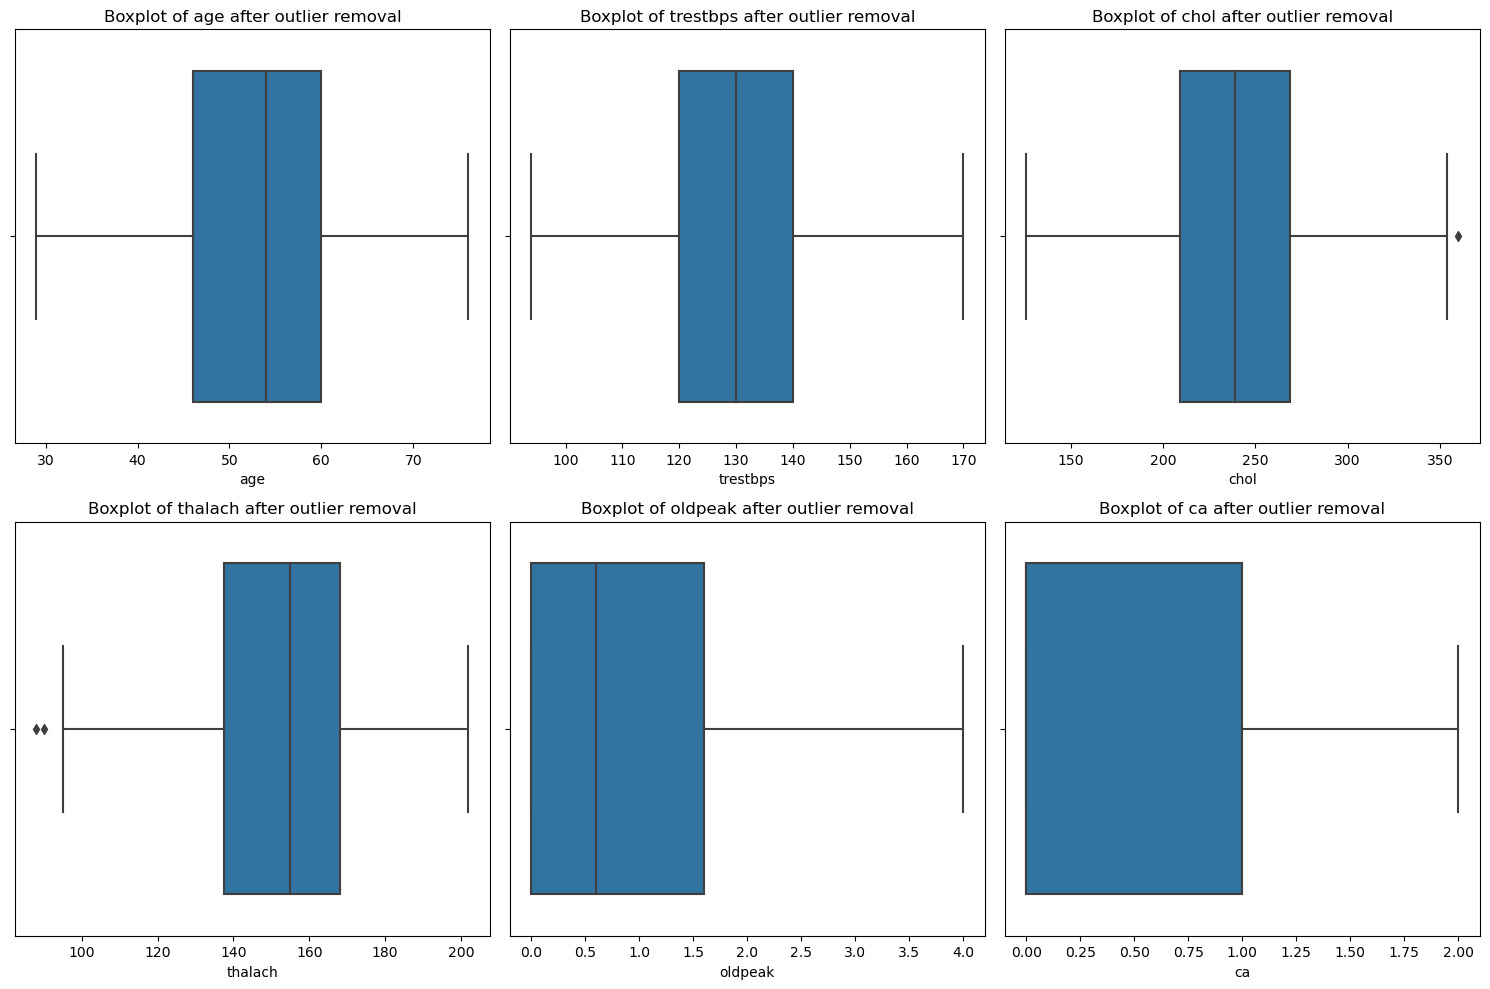

In [33]:
from scipy import stats
import numpy as np

#func to remove otliers using Z-Score method
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Applying Z-Score method t each numerical column
for feature in numerical_features:
    df = remove_outliers_zscore(df, feature)

print("Remaining data points after removing outliers with Z-Score method:")
print(df.shape)

# saving cleaned dataset to a new CSV file
df.to_csv('heart_disease_clean.csv', index=False)
print("Cleaned dataset saved as 'heart_disease_clean.csv'.")

#Re-plotting boxplots after outlier removal
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature} after outlier removal')
plt.tight_layout()
plt.show()

### B. Histograms

We created histograms for key features such as age, cholesterol, resting blood pressure, hand maximum heart rate. These visualiztions show the distribution of these attributes and help identify any patterns or anomalies. The age attribute shows a large distribution of participants between the ages of 40 and 70. The cholesterol histogram is mostly non-skewed, with a slight right skew toward higher cholesterol, indicating higher cholesterol levels for some individuals. The expected medical ranges for total cholesterol is: Less than 200 mg/dL is normal, 200–239 mg/dL is borderline high, and 240 mg/dL or higher is high. Approximatly only 50 participants were in the normal range, the range with the least distribution was the borderline group, and about half of the participants had a cholesterol greater than 240 mg/dL. Max heart rate was left skewed, with a concentration in the 140-180 range; this is not necessarily a good indicator on it's own because the average expected range for different ages is very wide per age group but most patients have a maximum heart rate between 100 and 180. Higher heart rate values might correlate with healthier patients, while lower values could indicate heart disease. Resting blood pressure shows a concentrated range around 120-140, but with some higher outliers that were addressed during the removal phase.

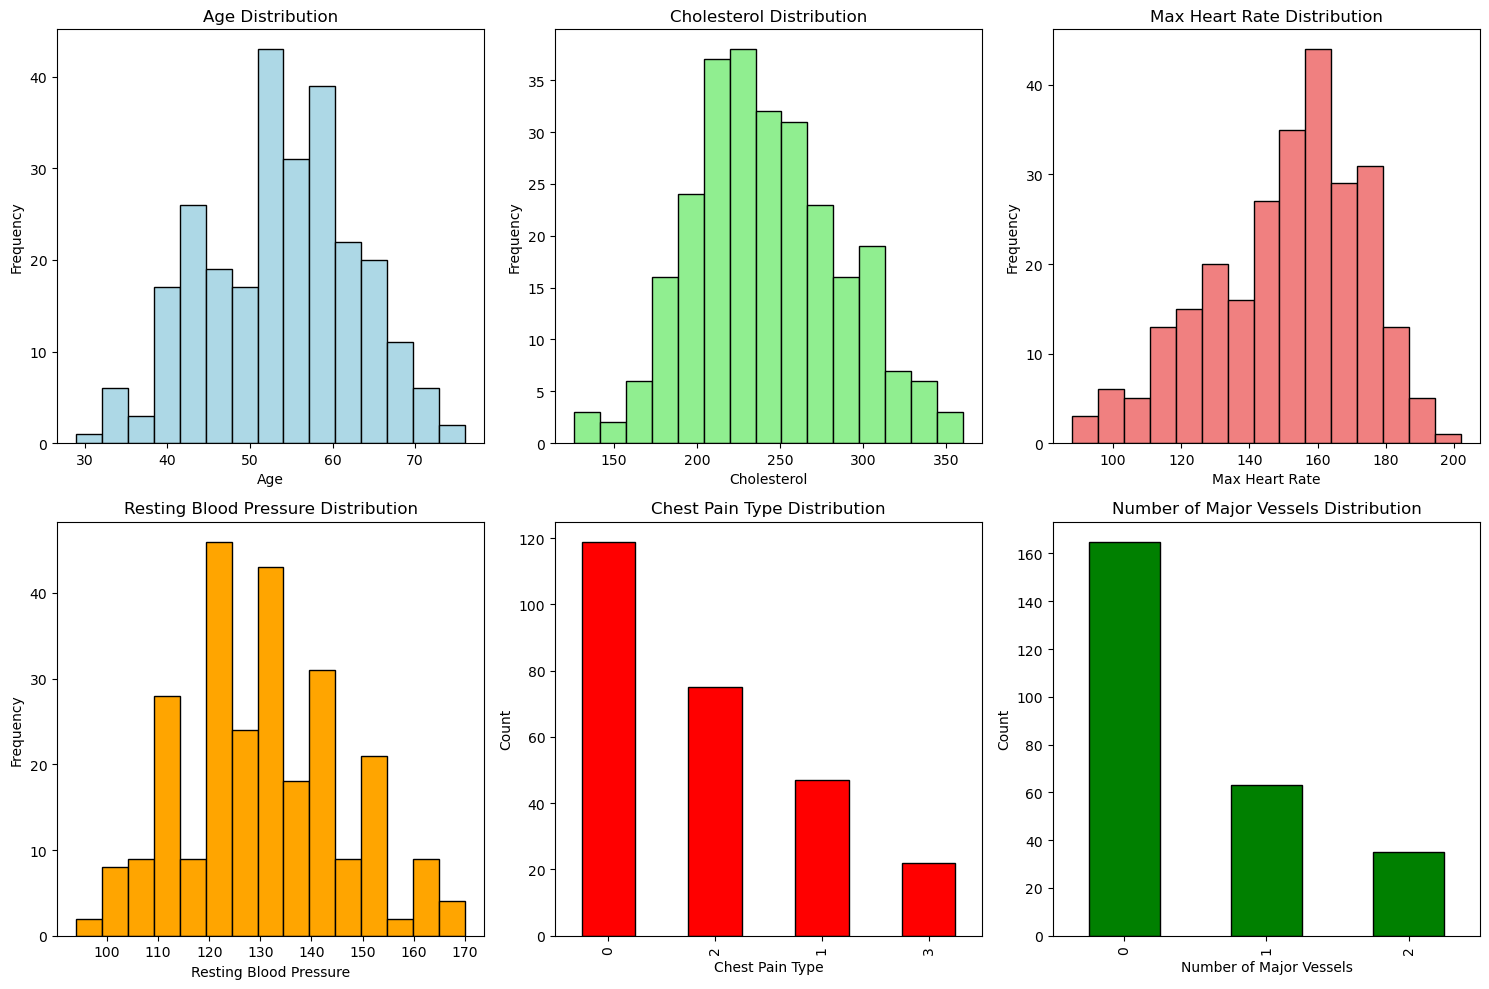

In [26]:
# Plot histograms for key features
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

# Age histogram
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st position
plt.hist(df['age'], bins=15, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Cholesterol histogram
plt.subplot(2, 3, 2)  # 2nd position
plt.hist(df['chol'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

# Max heart rate (thalach) histogram
plt.subplot(2, 3, 3)  # 3rd position
plt.hist(df['thalach'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Max Heart Rate Distribution')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')

# Resting blood pressure
plt.subplot(2, 3, 4)  # 4th position (new row)
plt.hist(df['trestbps'], bins=15, color='orange', edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')

# Chest pain type (categorical bar chart)
plt.subplot(2, 3, 5)  # 5th position
df['cp'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Number of major vessels
plt.subplot(2, 3, 6)  # 6th position
df['ca'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Major Vessels Distribution')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')

plt.tight_layout()  # Ensures everything fits without overlap
plt.show()


### C. Correlation Matrix Heatmap

We implemented a correlation matrix to examine the relationships between numerical features and their potential impact on heart disease prediction. This helps us to identify highly correlated variables that might influence the target. 
- Positively correlated attributes: as these attributes increase, the likelihood of heart disease (target=1) also increases.
    - CP (chest pain): was 0.41, indicating higher chest pain is a higher likelihood of heart disease
    - Thalach (maximum heart rate): 0.39, higher max heart rate correlates positively with heart disease.
    - Slope (slope of the peak exercise ST segment):  0.32, higher slope tends to correlate with heart disease.

- Negatively correlated attributes: as these attributes increase, the likelihood of heart disease decreases (target=0).
    - Exang (exercise-induced angina): -0.43, more angina tends to lower the likelihood of heart disease.
    - Oldpeak (ST depression induced by exercise): -0.44, higher oldpeak values lower the likelihood of heart disease.
    - CA (number of major vessels collored by fluoroscopy and Thal (thalassemia levels): -0.46 and -0.36, these have negative correlations, indicating higher values of these features decrease the likelihood of heart disease.
    - Sex (female=0, male=1): -0.33, females are less likely to have heart disease compared to males.

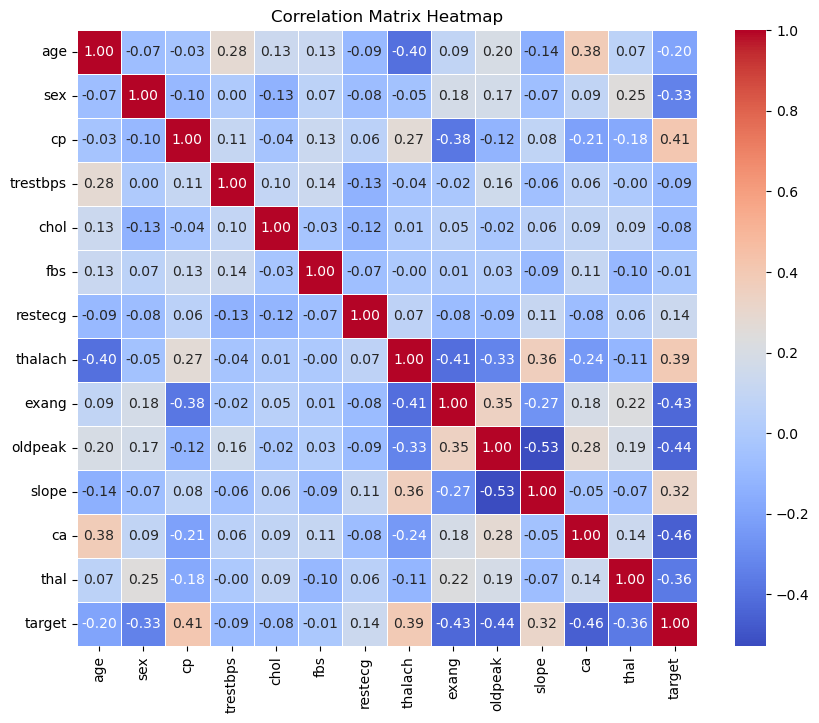

In [19]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### D. Pair Plots

We used pair plots to visualize the relationships between key features and heart disease presence, making it easier to detect trends and interactions betweeen variables. However, there weren't any distinct linear relationsihips or clustering that could be drawn from the data. The diagonal elements did help showing skewness and modality diferences between targets (with or without disease) or lack thereof.

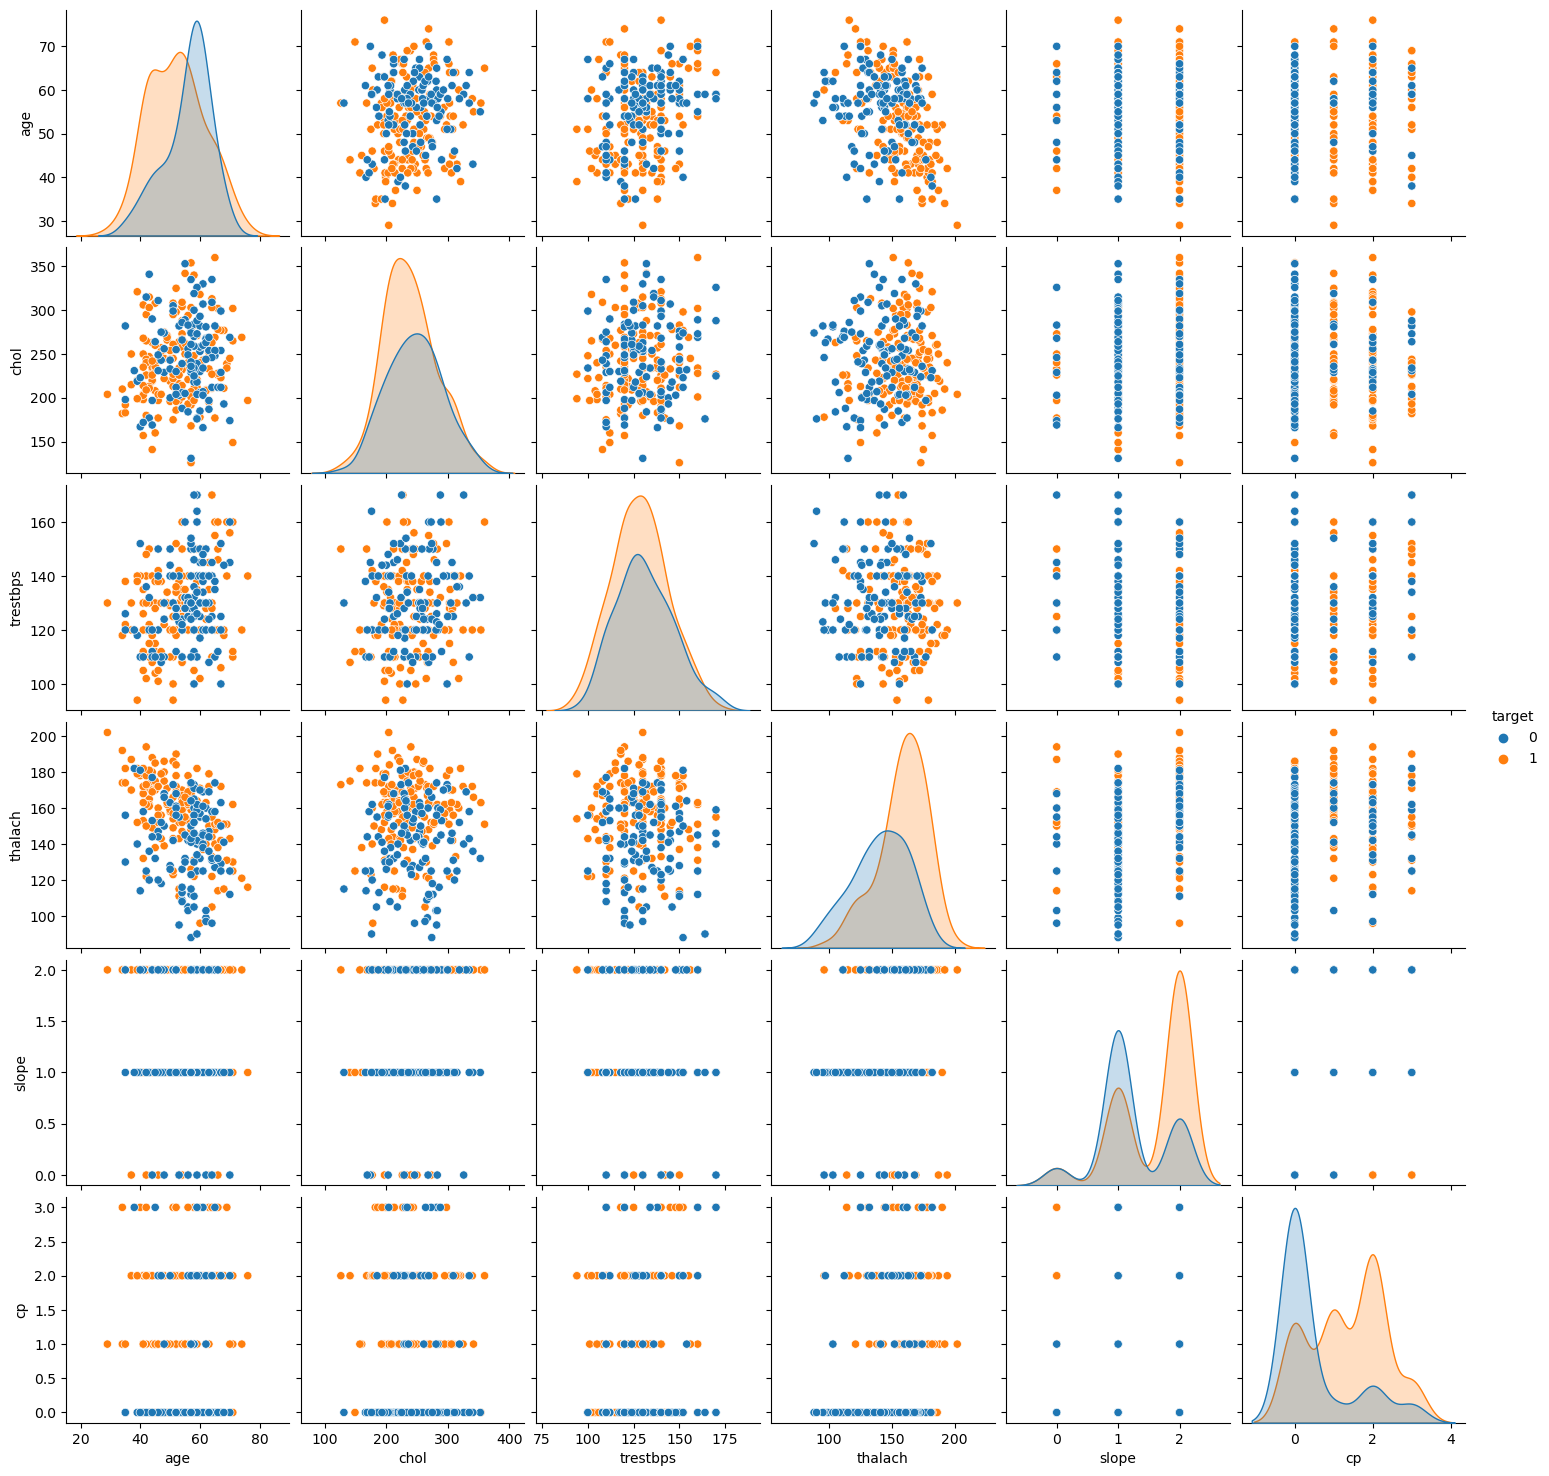

In [30]:
# Import seaborn for pairplot
# sns.pairplot(df[['age', 'chol', 'thalach', 'target']], hue='target')
# plt.show()
pairplot_features = ['age', 'chol', 'trestbps', 'thalach', 'slope', 'cp','target']

sns.pairplot(df[pairplot_features], hue='target')
plt.show()

### E. General EDA Summary

Our exploratory data analysis (EDA) focused on understanding the distribution and relationships between the key features in the heart disease dataset and how they correlate with heart disease presence (target). We began with data cleaning to ensure a reliable dataset, then moved into visualizing the data through histograms and a correlation matrix to explore patterns and relationships. A pair plot was also utilized to observe how features interact with one another.

After cleaning, we found that important features like cholesterol, age, resting blood pressure, and max heart rate displayed distinct distributions, often highlighting the presence of heart disease in patients. The correlation matrix revealed key relationships between features and the target variable (heart disease), while the pair plot allowed us to see potential but non-linear interactions between variables.

### F. Conclusions and Discussion
Our analysis uncovered some meaningful patterns and potential predictive relationships in the data. Notably:

Chest pain (CP), maximum heart rate (thalach), and slope showed positive correlations with heart disease, meaning that as these values increase, the likelihood of heart disease also increases. This makes sense clinically, as chest pain and heart rate are both indicators of heart health and exertion.

Exercise-induced angina (exang), oldpeak, number of major vessels (CA), and thalassemia levels (thal) were negatively correlated, suggesting that higher values in these features are associated with a lower likelihood of heart disease. In particular, oldpeak and CA stood out with relatively strong negative correlations, possibly indicating better heart function in patients with lower values.

Interestingly, sex showed a moderate negative correlation (-0.33), suggesting that women in this dataset were less likely to have heart disease than men. This aligns with known clinical findings, but further analysis is required to understand if this difference is statistically significant.

Despite these findings, the pair plot did not reveal strong linear relationships or distinct clustering between heart disease and the other features, indicating that simple linear models may struggle to capture the full complexity of the relationships in this dataset.

Overall, the analysis suggests that certain features such as chest pain, max heart rate, and exercise-induced angina can provide valuable predictive insight, but we should consider using more advanced models (like logistic regression or decision trees) to capture non-linear relationships and interactions between variables. This analysis can also guide further investigation into feature selection and model tuning in the modeling phase.

## Model Building and Model Choice

As we are trying to predict the presence of heart disease, which is a binary classification problem, there are several options for suitable models to choose from:
- Logistic Regression (Baseline Model): Simple and interpretable, often used as a starting point for binary classification.
- K-Nearest Neighbors (KNN): Good for classification but sensitive to the scale of the data and number of neighbors (hyperparameters).
- Decision Tree: Works well for capturing non-linear relationships between features, easy to visualize and interpret.

### A. Logistic Regression
We will start with Logistic Regression to get a baseline model.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_disease_clean.csv")

# Features (X) and Target (y)
X = df.drop(columns=['target'])
y = df['target']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization for KNN, Logistic Regression, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


########### Logistic Regression Baseline Model #############

#Import logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9056603773584906
Confusion Matrix:
 [[17  3]
 [ 2 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      0.94      0.93        33

    accuracy                           0.91        53
   macro avg       0.90      0.89      0.90        53
weighted avg       0.91      0.91      0.91        53

ROC-AUC Score: 0.8946969696969697


### B. Model 2, K-Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define the KNN model
knn = KNeighborsClassifier()

# Hyperparameter tuning with grid search (find the best number of neighbors)
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_grid = GridSearchCV(knn, param_grid, cv=5)
knn_grid.fit(X_train_scaled, y_train)

#Best num of neighbors
print("Best K for KNN:", knn_grid.best_params_)

# Predict on the test set
y_pred_knn = knn_grid.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_knn))

Best K for KNN: {'n_neighbors': 17}
KNN Accuracy: 0.8679245283018868
Confusion Matrix:
 [[14  6]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.84      0.97      0.90        33

    accuracy                           0.87        53
   macro avg       0.89      0.83      0.85        53
weighted avg       0.88      0.87      0.86        53

ROC-AUC Score: 0.8348484848484847


### C. Model 3, Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

#Train the decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

#Predict on the test set
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tree))



Decision Tree Accuracy: 0.8301886792452831
Confusion Matrix:
 [[20  0]
 [ 9 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82        20
           1       1.00      0.73      0.84        33

    accuracy                           0.83        53
   macro avg       0.84      0.86      0.83        53
weighted avg       0.88      0.83      0.83        53

ROC-AUC Score: 0.8636363636363636


### E. Model Comparison

In [59]:
#Store acuracy and ROC-AUC scores for comparison
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_tree),
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_log_reg),
        roc_auc_score(y_test, y_pred_knn),
        roc_auc_score(y_test, y_pred_tree),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.905660  0.894697
1                  KNN  0.735849  0.699242
2        Decision Tree  0.830189  0.863636


## 5. Model Training

Finding the best hyper parameters of the model with GridSearchCV. 


### A. Decision Tree - Hyperparameter tuning

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Init Decision Tree classifier
dt = DecisionTreeClassifier()

# GridSearchCV
grid_search_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


### B. Decision Tree - Overfitting check

In [61]:
# Train Decision Tree with the best parameters
dt_best = grid_search_dt.best_estimator_

# Calculate training and test accuracy
train_accuracy_dt = dt_best.score(X_train, y_train)
test_accuracy_dt = dt_best.score(X_test, y_test)

print(f"Decision Tree Training Accuracy: {train_accuracy_dt}")
print(f"Decision Tree Test Accuracy: {test_accuracy_dt}")


Decision Tree Training Accuracy: 0.8523809523809524
Decision Tree Test Accuracy: 0.8867924528301887


### C. Decision Tree - Feature selection

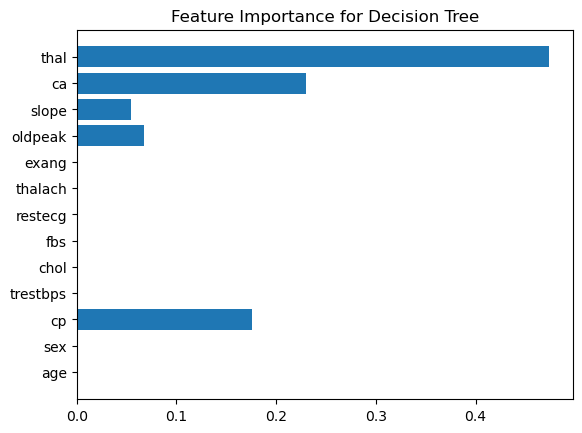

In [62]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances_dt = dt_best.feature_importances_

# Plot feature importances
plt.barh(X_train.columns, feature_importances_dt)
plt.title('Feature Importance for Decision Tree')
plt.show()


### D. Decision Tree - Imbalance Handling, using F1-score 

In [64]:
from sklearn.metrics import f1_score, roc_auc_score

# Predict on test set
y_pred_dt = dt_best.predict(X_test)

#Evaluate using F1-Score and ROC-AUC
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])

print(f"Decision Tree F1-Score: {f1_dt}, ROC-AUC: {roc_auc_dt}")


Decision Tree F1-Score: 0.9090909090909091, ROC-AUC: 0.9287878787878788


## 6. Results and Analysis

For this project, we;ve focused on predicting the presence of heart disease using the Heart Disease Dataset from Kaggle. After going through the process of thorough data cleaning and exploratory data analysis (EDA), we proceeded to implement a Decision Tree classifier to gain insights into the dataset. The hyperparameter tuning for the Decision Tree yielded the following optimal parameters: criterion: gini, max_depth: 3, and min_samples_split: 2.

The Decision Tree model showd a training accuracy of 85.2% and a test accuracy of 88.7%. These results indicate that the model generalizes well on unseen data, highlighting its potential for practical applications in predicting heart disease risk based on the selected health indicators.

To further understand the model's decision-making process, we analyzed the feature importances identified by the Decision Tree. The top features contributing to the prediction of heart disease included Thal, CA (number of major vessels colored by fluoroscopy), Slope, Oldpeak, and CP (chest pain). This aligns with our earlier EDA findings, emphasizing the relevance of these features in predicting heart disease.

Summary of the model's performance and feature importances:

| Metric                         | Value                                         |
|--------------------------------|-----------------------------------------------|
| Best Decision Tree Parameters   | Criterion: Gini, Max Depth: 3, Min Samples Split: 2 |
| Training Accuracy            | 85.2%                                        |
| Test Accuracy              | 88.7%                                        |
| Important Features             | Thal, CA, Slope, Oldpeak, CP                 |

In addition to accuracy, it's crucial to consider other evaluation metrics, particularly when dealing with clasification tasks involving potential class imbalances. Metrics such as F1 Score, ROC AUC, and confusion matrices provide aditional insights into model performance. These metrics were not explored in this iteration but should be prioritized in future work, particlarly if the distribution of heart disease across classes (0 to 4) is found to not be even.

## Discussion and Conclusion

The analysis revealed several meaningful patterns in the Heart Disease Dataset. The model identified chest pain (CP), maximum heart rate (thalach), and slope as positive predictors of heart disease, reinforcing clinical knowledge that these factors are indicative of heart health. Conversely, features like exercise-induced angina (exang), oldpeak, and CA showed negative correlations with heart disease presence, suggesting that patients with lower values in these attributes might exhibit better heart function.

Despite these promising findings, the Decision Tree model's ability to capture non-linear relationships is limited due to its structure. The lack of strong linear relationships or clear clustering in the pair plots indicates that other modeling approaches may provide even better predictive performance. Perhaps doing other more complex models like Random Forests or Gradient Boosting, which could potentially capture intricate interactions among attributes.

While this analysis has uncovered valuable insights into heart disease predictors, some limitations exist. For example, our dataset may not be representative of the broader population due to the relatively small sample size (303 patients), which could impact the model's generalizability. Aditionally, external factors such as lifestyle, family history, and socioeconomic status were not included in the dataset, limiting the model's context. Despite this, the overarching goal remains clear: to leverage health data for early detection and prevention of heart disease, ultimately contributing to better patient outcomes.